### 1. 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
from konlpy.tag import Okt, Kkma
from collections import Counter
from wordcloud import WordCloud

from wordcloud import WordCloud
import re

#### - 구글 번역 임포트

In [2]:
# pip install googletrans==4.0.0-rc1

In [2]:
from googletrans import Translator

# 구글 번역 예시 (영어를 프랑스어로 번역)
translator = Translator()
text = "Hello, how are you?"
translated_text = translator.translate(text, dest='fr')
translated_text.text

'Bonjour comment allez-vous?'

### 2. 데이터 읽고 파악하기

In [3]:
# 장소컬럼까지 붙인 파일 불러오기
df = pd.read_csv('data/부산(장소포함).csv')
df

,Texts,Spots
0,"부산 해운대 가볼 만한 곳\n블루라인파크 스카이캡슐 정거장 추천!\n글, 사진 ⓒ ...",해운대블루라인파크 미포정거장
1,이번 부산 여행 계획하면서\n아이들이 좋아하는 기차 열차 태워주고싶어\n알아본 부산...,해운대블루라인파크 미포정거장
2,230722 토\n#해운대해변열차\n#해운대블루라인파크\n탑승 후기\n50m\n© ...,해운대블루라인파크 미포정거장
3,안녕하세요 ㅎㅎ\n오늘도 계속되는 부산 여행 포스팅!\n오늘은 저희의 여행 코스였던...,해운대블루라인파크 미포정거장
4,"안녕하세요. 도순이입니다.\n제가 얼마 전 부산 여행에 다녀왔는데요,\n해운대에 해...",해운대블루라인파크 미포정거장
...,...,...
3745,스마트 혁신기술이 가득한 미래도시를 상상해 본 분들 있으신가요?\n누구나 미래에는 ...,에코델타시티전망대
3746,에코델타시티를 한바퀴 돌아보고 왔습니다.\n둔치2호대교에서 바라본 에코델타시티 전경...,에코델타시티전망대
3747,안녕하세요\n90건설 기계 운송 안과장입니다\n오늘 두번째 업무로 10 롱 붐 장비...,에코델타시티전망대
3748,"여러분 안녕하세요?\n최신 부동산 청약일정, 분양가, 청약경쟁률, 당첨가점, 임장활...",에코델타시티전망대


### 3. 데이터 전처리 및 시각화

In [4]:
# 한국어_불용어_목록
sw = pd.read_csv('data/한국어_불용어_목록.csv')
sw

,Stopwords
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
672,일곱
673,여덟
674,아홉
675,령


#### 3-1. Top 20개 키워드 bar chart

In [5]:
# 이모지 제외하고 나머지만 추출하기
def txt_without_emoji(df,spot):
    contents = list(df[df.Spots==spot].Texts)
    contents =  ' '.join(str(item) for item in contents)
    contents1 = contents.replace('\n', ' ')
    cleaned_text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', contents1)
    return cleaned_text

texts = txt_without_emoji(df,'롯데월드 어드벤처 부산')

##### data 폴더 안에 img 폴더 만들기 - img 폴더에 저장까지 되도록 함수를 만들었습니다

In [6]:
def top_words(df, spot):
    contents = list(df[df.Spots==spot].Texts)
    contents =  ' '.join(str(item) for item in contents)
    cleaned_text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', contents)
    okt=Okt()
    nouns = okt.nouns(cleaned_text)
    nouns2 = [word for word in nouns if len(word) > 1]
    kor_sw = list(np.hstack(sw.values))
    nouns3 = [noun for noun in nouns2 if noun not in kor_sw]
    nouns_cnt = Counter(nouns3)
    tokens_df = pd.DataFrame(pd.Series(nouns_cnt), columns=['Freq'])
    sorted_df = tokens_df.sort_values(by='Freq',ascending=False)
    top_df = sorted_df.iloc[:20]
    translator = Translator()
    trans_text = [translator.translate(i, dest='en').text for i in top_df.index]
    sns.barplot(data = top_df, x='Freq', y= trans_text)
    plt.savefig(f'data/img/{spot} 상위20개 단어빈도.png', bbox_inches='tight')
    plt.figure(figsize=(8,4))
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


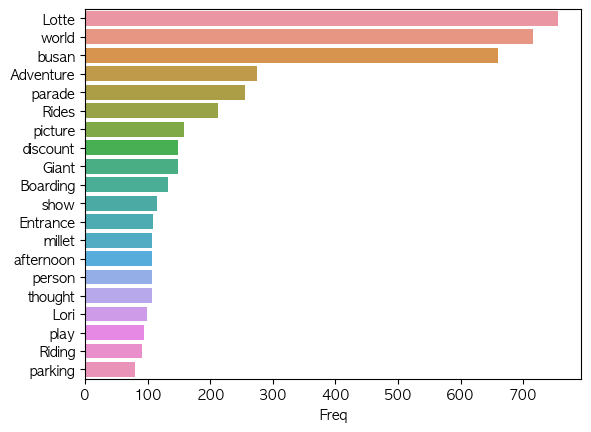

<Figure size 800x400 with 0 Axes>

In [13]:
top_words(df,'롯데월드 어드벤처 부산')

#### 3-2. 워드클라우드

In [13]:
spots ='광안리해수욕장'
contents = list(df[df.Spots==spots].Texts)
contents =  ' '.join(str(item) for item in contents)
cleaned_text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', contents)
okt=Okt()
nouns = okt.nouns(cleaned_text)
nouns2 = [word for word in nouns if len(word) > 1]
kor_sw = list(np.hstack(sw.values))
nouns3 = [noun for noun in nouns2 if noun not in kor_sw]
nouns_cnt = Counter(nouns3)
tokens_df = pd.DataFrame(pd.Series(nouns_cnt), columns=['Freq'])
sorted_df = tokens_df.sort_values(by='Freq',ascending=False)
top_df = sorted_df.iloc[:100]
translator = Translator()
translated = [translator.translate(idx, dest='en').text for idx in list(top_df.index)]
top_df.index = translated
top_df

,Freq
Light,527
busan,259
Gwangalli Beach,198
cafe,146
Beach,141
...,...
side dish,23
fried rice,23
building,23
shrimp,23


##### data 폴더 안에 img 폴더 만들기 - img 폴더에 저장까지 되도록 함수를 만들었습니다

In [29]:
# 장소컬럼까지 붙인 파일 불러오기
df = pd.read_csv('data/인천(장소포함).csv')
df

,Unnamed: 0,Texts,Spots
0,0,벚꽃날리던 4월의 봄🌸🌸\n인천대공원 캠핑장 1박2일 봄캠핑\n너나들이 캠핑장 자가...,인천대공원
1,1,날씨가 기가막히네! 무조건 외출각이다!\nmasil\n이주의 날씨는 그야말로 최고였...,인천대공원
2,2,안녕하세요\n얼마전 벚꽃축제한다고 급히 일정잡아 다녀온\n인천대공원 너나들이 캠핑장...,인천대공원
3,3,화려한 봄 풍경을 보여주는 인천공원 꽃 산책\n여름 날씨처럼 화창했던 주말에 인천아...,인천대공원
4,4,"인천대공원, 인천가볼만한곳,\n아이와가볼만한곳, 인천실외데이트,\n인천동물원, 인천...",인천대공원
...,...,...,...
3745,3745,화개산 전망대 스카이워크\n안녕하세요 쩐여사에요.\n11월 중순에 짝꿍과 화개산 전...,화개산전망대
3746,3746,인천 강화도 교동도 들어본 적 있으신가요?\n교동도는 민간인 출입통제구역이지만\n교...,화개산전망대
3747,3747,2023.10.21일 토요일\n아부지랑 어머니 모시고 강화도 바람쐬러 가는날\n올해...,화개산전망대
3748,3748,2023.04.09~04.10\n30m\n© NAVER Corp.\n화개정원\n인천...,화개산전망대


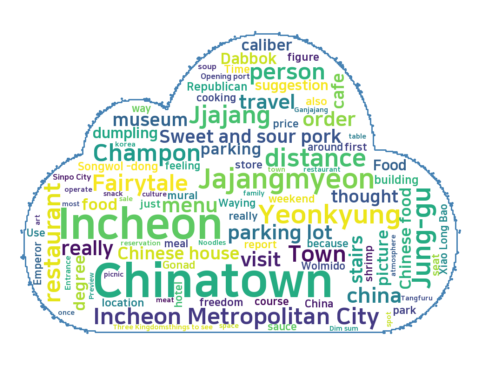

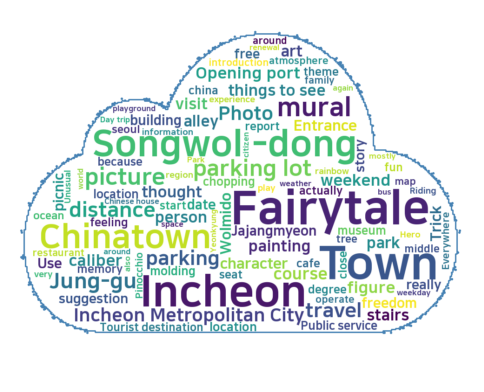

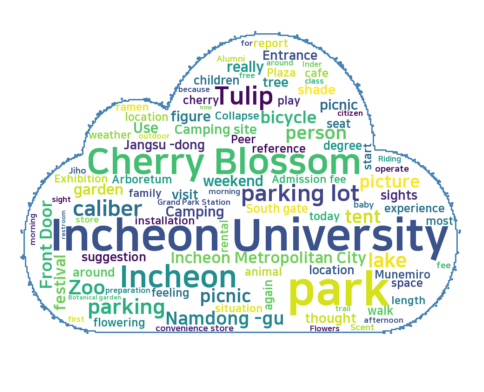

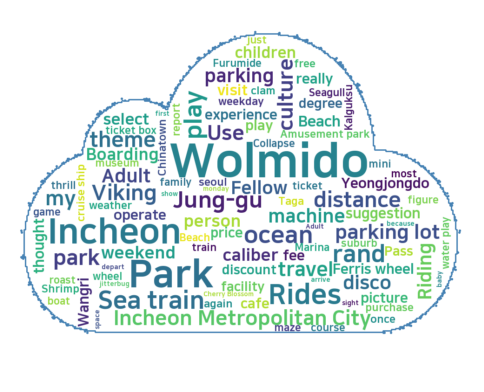

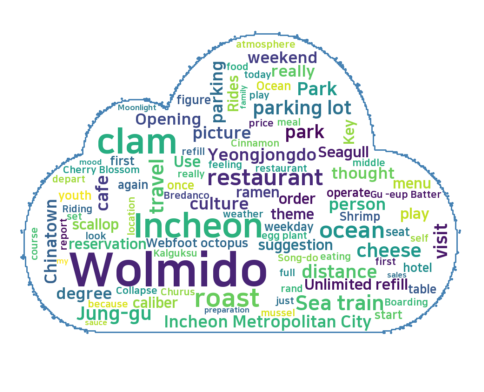

In [30]:
busan_spots = ['광안리해수욕장', '다대포해수욕장', '해운대 포장마차촌', '해운대해수욕장', '롯데월드 어드벤처 부산']
seoul_spots = ['서울식물원', '롯데월드 어드벤처', '경복궁', '석촌호수 서호', '서울어린이대공원']
sejong_spots = ['아띠쥬', '고복저수지', '국립세종수목원', '조치원테마거리', '도도리파크']
incheon_spots = ['인천차이나타운', '송월동동화마을', '인천대공원', '월미테마파크', '월미도']

# 워드클라우드
from PIL import Image
def wordcloud(spots):
    contents = list(df[df.Spots==spots].Texts)
    contents =  ' '.join(str(item) for item in contents)
    cleaned_text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', contents)
    okt=Okt()
    nouns = okt.nouns(cleaned_text)
    nouns2 = [word for word in nouns if len(word) > 1]
    kor_sw = list(np.hstack(sw.values))
    nouns3 = [noun for noun in nouns2 if noun not in kor_sw]
    nouns_cnt = Counter(nouns3)
    tokens_df = pd.DataFrame(pd.Series(nouns_cnt), columns=['Freq'])
    sorted_df = tokens_df.sort_values(by='Freq',ascending=False)
    top_df = sorted_df.iloc[:100]
    translator = Translator()
    translated = [translator.translate(idx, dest='en').text for idx in list(top_df.index)]
    top_df.index = translated
    cloud_mask = np.array(Image.open('./data/img/cloud.jpg'))
    font_path = '/Users/crystal.moon/Library/Fonts/NanumSquareEB.ttf'
    wordcloud = WordCloud(max_font_size=100, 
                      background_color='white', 
                    mask = cloud_mask,
                    contour_width=2,
                     contour_color='steelblue',
                      font_path=font_path).generate_from_frequencies(top_df.Freq)
    
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation = 'bilinear') 
    plt.savefig(f'data/img/{spots} 워드클라우드.png', bbox_inches='tight')
    plt.show()

for spots in incheon_spots:
    wordcloud(spots)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
# 관광지명 
place = pd.read_csv('data/관광지_리뷰수.csv')
spots = list(place[place['Region']=='부산']['Spots'])
print(spots)

['해운대블루라인파크 미포정거장', '광안리해수욕장', '감천문화마을', '해운대해수욕장', '롯데월드 어드벤처 부산', '아홉산숲', '흰여울문화마을', '오륙도스카이워크', '허심청 호텔농심', '엑스더스카이', '해운대블루라인파크 청사포정거장', '송도해수욕장', '송도해상케이블카 송도베이스테이션', '송정해수욕장', '스카이라인 루지', '태종대 전망대', '해운대블루라인파크 송정정거장', '부산어린이대공원', '해리단길', '송도해상케이블카 송도스카이파크', '동백섬', '청사포다릿돌전망대', 'BIFF광장', '태종대유원지', '보수동책방골목', '죽성드림세트장', '다대포해수욕장', '일광해수욕장', '임랑해수욕장', '해운대수목원', '클럽디오아시스', '이기대해안산책로', '부산타워', '초량차이나타운', '황령산 봉수대', '부산화명수목원', '영도대교 포장마차거리', '온천천카페거리', '초량이바구길', '국제시장먹자골목', '런닝맨 부산점', '전포카페거리', '송상현광장', '부산역광장', '온천천', '해운대달맞이길', '개금벚꽃길', '감천문화마을 안내센터', '충렬사', '황령산전망쉼터', '황령산', '오륙도', '을숙도', '수정', '가덕도', '낙동강하굿둑 인증센터', '태종대자갈마당', '해운대블루라인파크 스카이캡슐', '해물포장마차촌', '아미산전망대', '남포동먹자골목', '금정산성 동문', '대항전망대', '금강식물원', '대영해수온천', '해운대 포장마차촌', '녹천탕', '금강공원 금강케이블카', '부산치유의숲', '해파랑길 1코스', '절영해안산책로', '봉래산', '백양산', '몰운대', '에코델타시티전망대']


In [25]:
# 여행지별 본문 내용을 하나로 합치기
contents = []
for spot in spots:
    texts = txt_without_emoji(df, spot)
    contents.append(list(texts))

In [26]:
#각 여행지별 텍스트를 데이터로 갖는 데이터프레임 생성
def df_75(contents):
    data = []
    for i in range(75):
        c = ''.join(contents[i])
        data.append([c])
    df = pd.DataFrame(data,columns = ['contents'])
    return df

In [27]:
contents_df = df_75(contents)
contents_df

,contents
0,부산 해운대 가볼 만한 곳 블루라인파크 스카이캡슐 정거장 추천 글 사진 여행 인플...
1,광안리 해수욕장 숙소 편안했던 보다스테이 더펜트 701호 후기 안녕하세요 토리입니다...
2,부산감성여행코스 감천문화마을 안녕하세요 여행블로거 와니예요 부산은 구도심에서 신도시...
3,둘째날 자갈치역에서 해운대로 이동하기 위해 교통 수단을 알아보니 지하철 버스 둘다 ...
4,롯데월드어드벤처 부산놀이동산 걸어다니거나 놀기 딱 좋은 온도였는데 흐림 실제로 이정...
...,...
70,DATE WITH YOU 흰여울문화마을 걷기 여름이 시작되기 전 거닐기 좋은날씨에요...
71,부산 초보 등산 코스 봉래산 손봉 자봉 정상 바다 전망 갈맷길 산 둘레길 가벼운 ...
72,부산 백양산 선암사 가는 길 선암사 부산광역시 부산진구 백양산로 138 부산 진구 ...
73,방문일자 2023 08 24 부산사하구산책 다대포산책길 오늘은 다대포에서의 이튿날...


In [28]:
# contents_df에 spots 열 추가하기
contents_df['spots'] = spots

In [29]:
contents_df

,contents,spots
0,부산 해운대 가볼 만한 곳 블루라인파크 스카이캡슐 정거장 추천 글 사진 여행 인플...,해운대블루라인파크 미포정거장
1,광안리 해수욕장 숙소 편안했던 보다스테이 더펜트 701호 후기 안녕하세요 토리입니다...,광안리해수욕장
2,부산감성여행코스 감천문화마을 안녕하세요 여행블로거 와니예요 부산은 구도심에서 신도시...,감천문화마을
3,둘째날 자갈치역에서 해운대로 이동하기 위해 교통 수단을 알아보니 지하철 버스 둘다 ...,해운대해수욕장
4,롯데월드어드벤처 부산놀이동산 걸어다니거나 놀기 딱 좋은 온도였는데 흐림 실제로 이정...,롯데월드 어드벤처 부산
...,...,...
70,DATE WITH YOU 흰여울문화마을 걷기 여름이 시작되기 전 거닐기 좋은날씨에요...,절영해안산책로
71,부산 초보 등산 코스 봉래산 손봉 자봉 정상 바다 전망 갈맷길 산 둘레길 가벼운 ...,봉래산
72,부산 백양산 선암사 가는 길 선암사 부산광역시 부산진구 백양산로 138 부산 진구 ...,백양산
73,방문일자 2023 08 24 부산사하구산책 다대포산책길 오늘은 다대포에서의 이튿날...,몰운대


In [30]:
# tfidf
tfidf = TfidfVectorizer()
ftr_mat1 = tfidf.fit_transform(contents_df['contents'])
print(f'TF-IDF 행렬의 크기: {ftr_mat1.shape}')

TF-IDF 행렬의 크기: (75, 269166)


In [31]:
# 유사도 검사
cosine_sim = cosine_similarity(ftr_mat1, ftr_mat1)
cosine_sim

array([[1.        , 0.14447589, 0.1718894 , ..., 0.07444209, 0.08343667,
        0.0545215 ],
       [0.14447589, 1.        , 0.20440942, ..., 0.09999405, 0.12022772,
        0.06424092],
       [0.1718894 , 0.20440942, 1.        , ..., 0.11777863, 0.15734365,
        0.08617247],
       ...,
       [0.07444209, 0.09999405, 0.11777863, ..., 1.        , 0.12638553,
        0.07587653],
       [0.08343667, 0.12022772, 0.15734365, ..., 0.12638553, 1.        ,
        0.05388298],
       [0.0545215 , 0.06424092, 0.08617247, ..., 0.07587653, 0.05388298,
        1.        ]])

In [32]:
# 여행지와 인덱스 사전 만들기
title_to_index = dict(zip(contents_df['spots'], contents_df.index))
title_to_index['롯데월드 어드벤처 부산']

4

In [ ]:
# list(enumerate(cosine_sim[4]))

In [33]:
# 유사도 높은 여행지 추출
def get_recommend(place, cosine_sim, n=10):
    idx = title_to_index[place]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores_top = sorted(sim_scores, key=lambda x:x[1], reverse=True)[1:n+1] 
    indices = [item[0] for item in sim_scores_top]
    return contents_df['spots'].iloc[indices]

In [34]:
get_recommend('롯데월드 어드벤처 부산',cosine_sim)

13     송정해수욕장
2      감천문화마을
3     해운대해수욕장
32       부산타워
22     BIFF광장
45    해운대달맞이길
70    절영해안산책로
11     송도해수욕장
9      엑스더스카이
43      부산역광장
Name: spots, dtype: object

In [35]:
place = '롯데월드 어드벤처 부산'
n=10
sel_idx = title_to_index[place]

top_n_idx = get_recommend(place, cosine_sim,n).index

place_idx = [sel_idx] + list(top_n_idx)
place_idx
cos_sim = cosine_similarity(ftr_mat1[place_idx], ftr_mat1[place_idx])

# plt.figure(figsize=(12,12))
# sns.heatmap(cos_sim, annot=True, fmt='.2f', xticklabels=place_idx, yticklabels=place_idx)
# plt.show()

In [37]:
# 데이터프레임으로 만들기
place = '롯데월드 어드벤처 부산'
n=10
sel_idx = title_to_index[place]

place_info = get_recommend(place, cosine_sim, n)
spot = place_info.values
place_idx = [sel_idx] + list(place_info.index)
cos_sim = cosine_similarity(ftr_mat1[place_idx], ftr_mat1[place_idx])
sim = cos_sim[0][1:]

df = pd.DataFrame(sim, index=spot, columns=['similarity'])
df

,similarity
송정해수욕장,0.169685
감천문화마을,0.144657
해운대해수욕장,0.140596
부산타워,0.139363
BIFF광장,0.138641
해운대달맞이길,0.138374
절영해안산책로,0.137563
송도해수욕장,0.136392
엑스더스카이,0.135344
부산역광장,0.129425


#### 이 중 상위 4개 -> 유사한 관광지 추천에 넣기

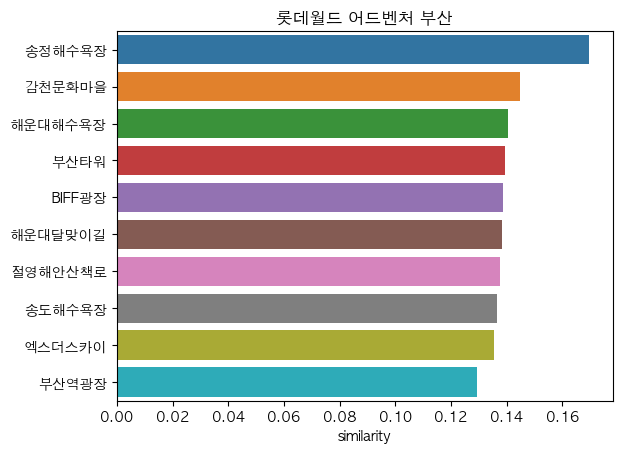

In [38]:
sns.barplot(data = df, x='similarity', y=df.index)
plt.title(f'{place}')
plt.savefig(f'data/img/{place} 유사도.png', bbox_inches='tight')
plt.show()